# Project： Image Analysis and Clusting

## Overview
### Welcome to an exciting project where we bring images to life through data analysis and clustering! In this journey, we’ll take a vibrant image of a rainbow, transform it into a dataset full of colorful pixel information, and explore the beauty of data by grouping these pixels into clusters. Whether it’s using scikit-learn’s trusty KMeans or diving into custom clustering magic with PyTorch, each task is a step deeper into the art and science of image processing. Let’s paint a picture with pixels, break it down into data, and watch the patterns unfold!

## Task 1: Creating the Dataset

### Objective
Your mission is to extract valuable data from the `rainbow1.jpg` image. We will transform each pixel into a row of data containing its (x, y) coordinates and RGB color values, creating a comprehensive dataset ready for analysis and visualization.

### Steps to Follow

1. **Load the Image**: Use the `PIL` (Pillow) library to open and read the image file. 
   * *Hint*: Make sure to handle images with an alpha channel (`RGBA`) by converting them to `RGB` to simplify your data.

2. **Convert to a NumPy Array**: Transform the image into a NumPy array for easy access to pixel data.

3. **Extract Coordinates and RGB Values**:
   - Create arrays for x and y coordinates using NumPy functions like `np.arange()` and `np.tile()`.
   - Reshape the image array to extract the RGB values for each pixel in a format that’s easy to work with.
   * *Hint*: The `reshape(-1, 3)` method helps flatten the array while keeping the RGB structure intact.

4. **Create a Pandas DataFrame**:
   - Combine the (x, y) coordinates and RGB values into a structured DataFrame.

5. **Inspect the DataFrame**:
   - Print out the first ten rows of the DataFrame to ensure that the data extraction was successful.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from scipy.ndimage import gaussian_filter
import warnings

warnings.filterwarnings("ignore")

image_path = '/kaggle/input/rainbow-image/rainbow1-1.jpg'
#Here, we are converting the image to RGB to then converting the image to array
image = Image.open(image_path).convert("RGB")
image_array = np.array(image)
height, width, _ = image_array.shape

#Extracting the coordinates usimg .tile() and .arrange() functions from the numpy package
x_coords = np.tile(np.arange(width), height)
y_coords = np.repeat(np.arange(height), width)

#We are making use of .flatten() from pd to extract RGB values from the image
data = pd.DataFrame({
    "x": x_coords,
    "y": y_coords,
    "R": image_array[:, :, 0].flatten(),
    "G": image_array[:, :, 1].flatten(),
    "B": image_array[:, :, 2].flatten()
})

In [2]:
#The first 10 rows of the data df
data.head(10)

x  y   R   G   B
0  0  0  68  67  49
1  1  0  42  43  27
2  2  0  43  43  31
3  3  0  34  35  27
4  4  0  50  49  44
5  5  0  20  17  12
6  6  0  20  10   8
7  7  0  60  49  43
8  8  0  46  34  22
9  9  0  44  35  18

## Task 2: Visualizing and Cleaning the Image Data

### Objective
Now that we have created a dataset from the `rainbow1.jpg` image, it's time to visualize the image and address any noise it may contain. Our goal is to print the image, identify noise, and use the dataset to remove or reduce that noise for a cleaner representation.

### Steps to Follow

1. **Visualize the Original Image**:
   - Use `matplotlib` to display the image from the dataset and observe any visible noise or artifacts.
2. **Analyze Noise**:
   - Look for patterns or outliers
   -  in the pixel data that indicate noise (e.g., isolated dark spots or random bright pixels).
3. **Filter the Dataset**:
   - Use conditions to filter out unwanted noise based on RGB values or other criteria.
4. **Reconstruct and Display the Cleaned Image**:
   - Reconstruct the image using the filtered DataFrame and visualize it to confirm that the noise has been reduced.

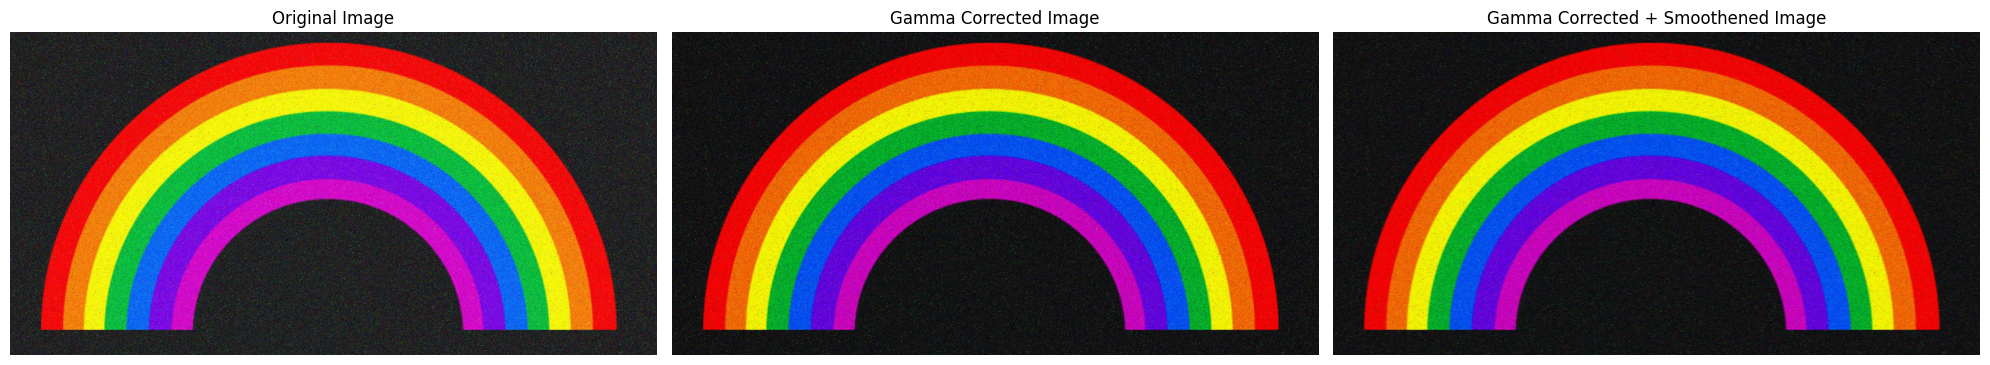

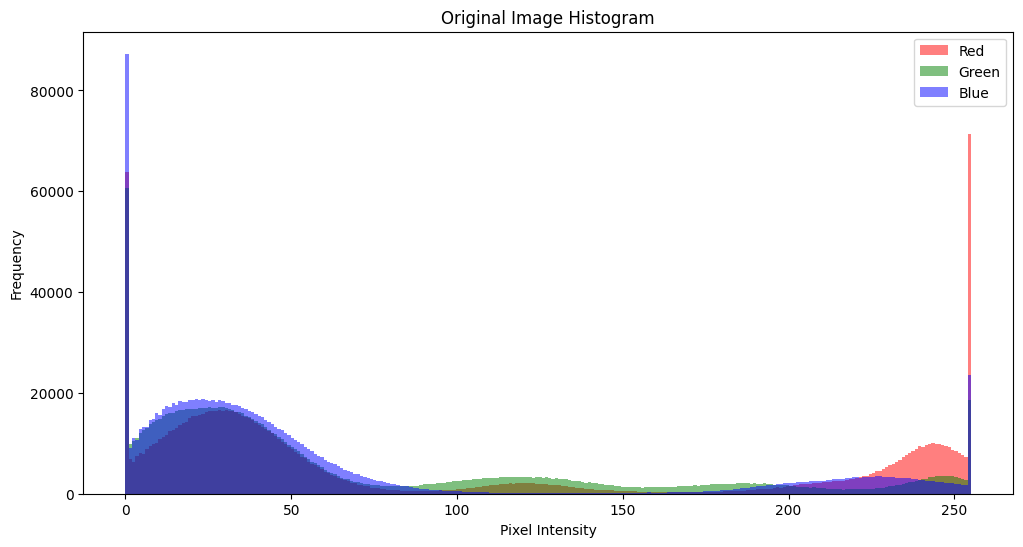

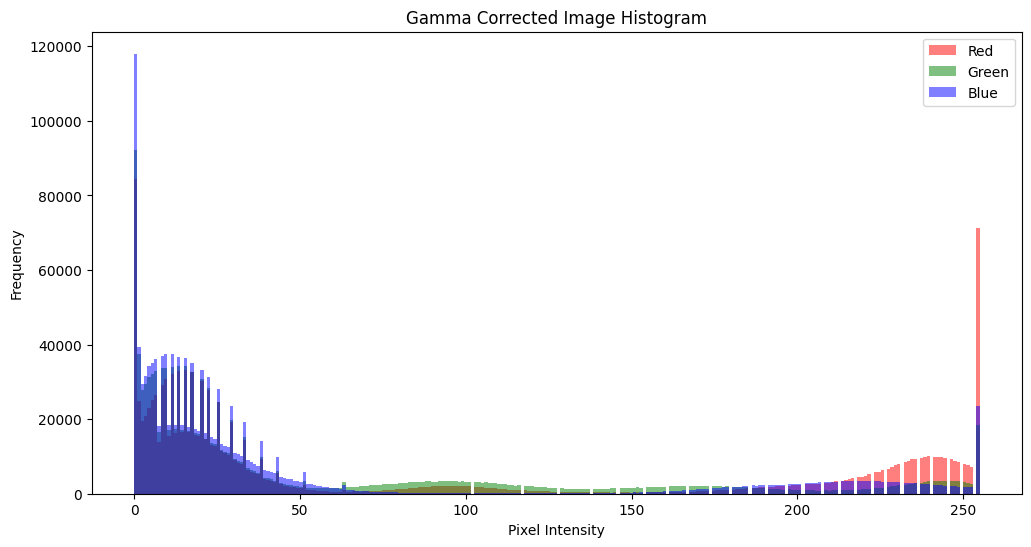

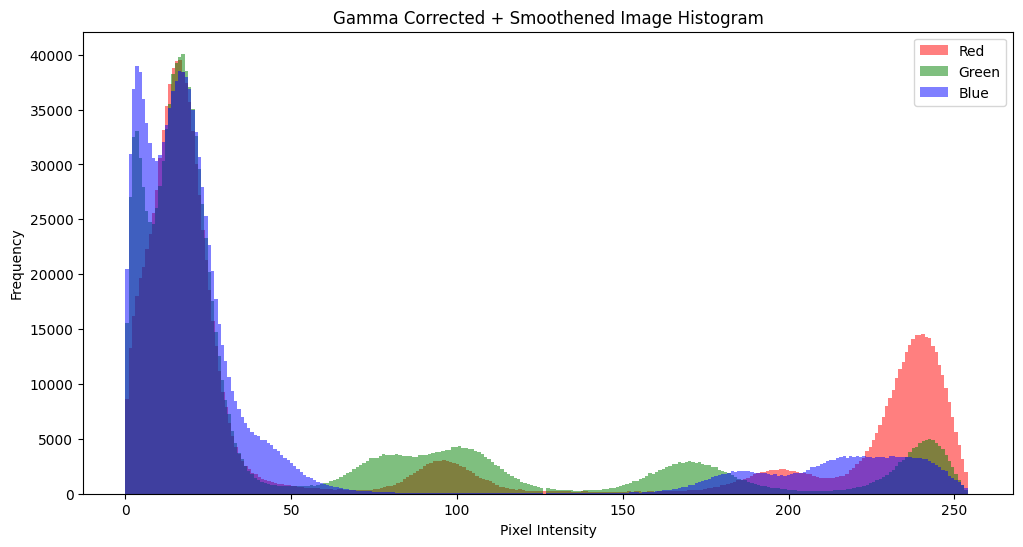

In [3]:
#In the original image histogram we can see spikes at 0 & 255 pixels, which is why we are using a hybrid method to reduce
# the intensities at 0 and 1. The approach involves first gamma correcting the image and then redistributing the pixels with 
# gussian distribution to ensure uniformity.
gamma = 1.3
gamma_corrected_data = data.copy()
gamma_corrected_data["R"] = (255 * ((gamma_corrected_data["R"] / 255) ** gamma)).astype(int)
gamma_corrected_data["G"] = (255 * ((gamma_corrected_data["G"] / 255) ** gamma)).astype(int)
gamma_corrected_data["B"] = (255 * ((gamma_corrected_data["B"] / 255) ** gamma)).astype(int)

gamma_corrected_image = gamma_corrected_data[["R", "G", "B"]].values.reshape((height, width, 3)).astype(np.uint8)

smoothened_gamma_data = gamma_corrected_data.copy()
for channel in ["R", "G", "B"]:
    smoothened_gamma_data[channel] = gaussian_filter(smoothened_gamma_data[channel].values, sigma=1)

smoothened_gamma_image = smoothened_gamma_data[["R", "G", "B"]].values.reshape((height, width, 3)).astype(np.uint8)

def plot_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

def plot_histograms(image_array, title):
    r_values = image_array[:, :, 0].flatten()
    g_values = image_array[:, :, 1].flatten()
    b_values = image_array[:, :, 2].flatten()

    plt.figure(figsize=(12, 6))
    plt.hist(r_values, bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g_values, bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b_values, bins=256, color='blue', alpha=0.5, label='Blue')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

plot_images(
    [image_array, gamma_corrected_image, smoothened_gamma_image],
    ["Original Image", "Gamma Corrected Image", "Gamma Corrected + Smoothened Image"]
)

plot_histograms(image_array, "Original Image Histogram")

plot_histograms(gamma_corrected_image, "Gamma Corrected Image Histogram")

plot_histograms(smoothened_gamma_image, "Gamma Corrected + Smoothened Image Histogram")

In [4]:
#From the above diagram we can observe that first using gamma correction the brightness of the image is adjusted 
# The image appearance has increased and then after that we applied gaussian smoothing using gaussian filter
#  to the gamma corrected data because of which the pixel distribution is uniform throughtout various channels 

In [5]:
# Here, we are counting the number of pixels and we can observe that without any information or pixel loss we 
# managed to enhance the image quality.
total_pixels_original = image_array.shape[0] * image_array.shape[1]
total_pixels_gamma_corrected = gamma_corrected_image.shape[0] * gamma_corrected_image.shape[1]
total_pixels_smoothened = smoothened_gamma_image.shape[0] * smoothened_gamma_image.shape[1]

print("Total Pixels:")
print(f"Original Image: {total_pixels_original}")
print(f"Gamma Corrected Image: {total_pixels_gamma_corrected}")
print(f"Gamma Corrected + Smoothened Image: {total_pixels_smoothened}")

Total Pixels:
Original Image: 1284003
Gamma Corrected Image: 1284003
Gamma Corrected + Smoothened Image: 1284003


## Task 3: KMeans Clustering with scikit-learn

### Objective
In this task, you'll apply clustering techniques to the image dataset to identify and group pixels with similar properties. The main goal is to learn how clustering can reveal patterns in data and segment the image into distinct regions based on color and position.

### Steps to Follow

1. **Standardize the Data**:
   - Choose an appropriate scaler from `scikit-learn` to standardize the pixel data, ensuring all features contribute equally to the clustering process. You may use any scaler that suits your needs (e.g., `StandardScaler`, `MinMaxScaler`).
   - *Hint*: Experimenting with different scalers can help you understand their impact on clustering results.

2. **Perform KMeans Clustering**:
   - Utilize `KMeans` from `scikit-learn` to cluster the dataset into groups. Select the number of clusters based on your analysis or experimentation.
   - *Note*: Clustering helps in understanding how data points (pixels) relate based on their features (x, y, R, G, B).

3. **Add Cluster Labels to the DataFrame**:
   - Assign the cluster labels to each pixel and append them to the DataFrame for further analysis and visualization.

4. **Visualize the Clustered Data**:
   - Use any plotting library of your choice to create a visualization that shows how the image is segmented into clusters.
   - *Tip*: Customize your plots to highlight the clusters effectively (e.g., color coding based on cluster labels).

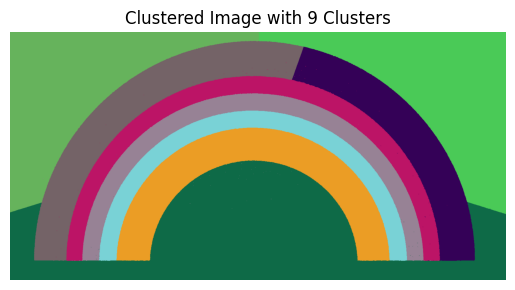

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

smoothened_data = smoothened_gamma_data.copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(smoothened_data[["x", "y", "R", "G", "B"]])

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
smoothened_data["Cluster"] = kmeans.fit_predict(scaled_data)

np.random.seed(42)
cluster_colors = np.random.randint(0, 256, size=(n_clusters, 3))

clustered_image = cluster_colors[smoothened_data["Cluster"]].reshape((height, width, 3)).astype(np.uint8)

plt.imshow(clustered_image)
plt.title(f"Clustered Image with {n_clusters} Clusters")
plt.axis("off")
plt.show()


In [7]:
# From the above diagram we can observe that the spatial information is not helping in clustering,
# i.e. due to spatial x,y co-ordinates kmeans is trying to cluster based upon spatial grouping rather than the main color information
# We may not use the x,y co-ordinated for clustering as these co-ordinates are not helping.

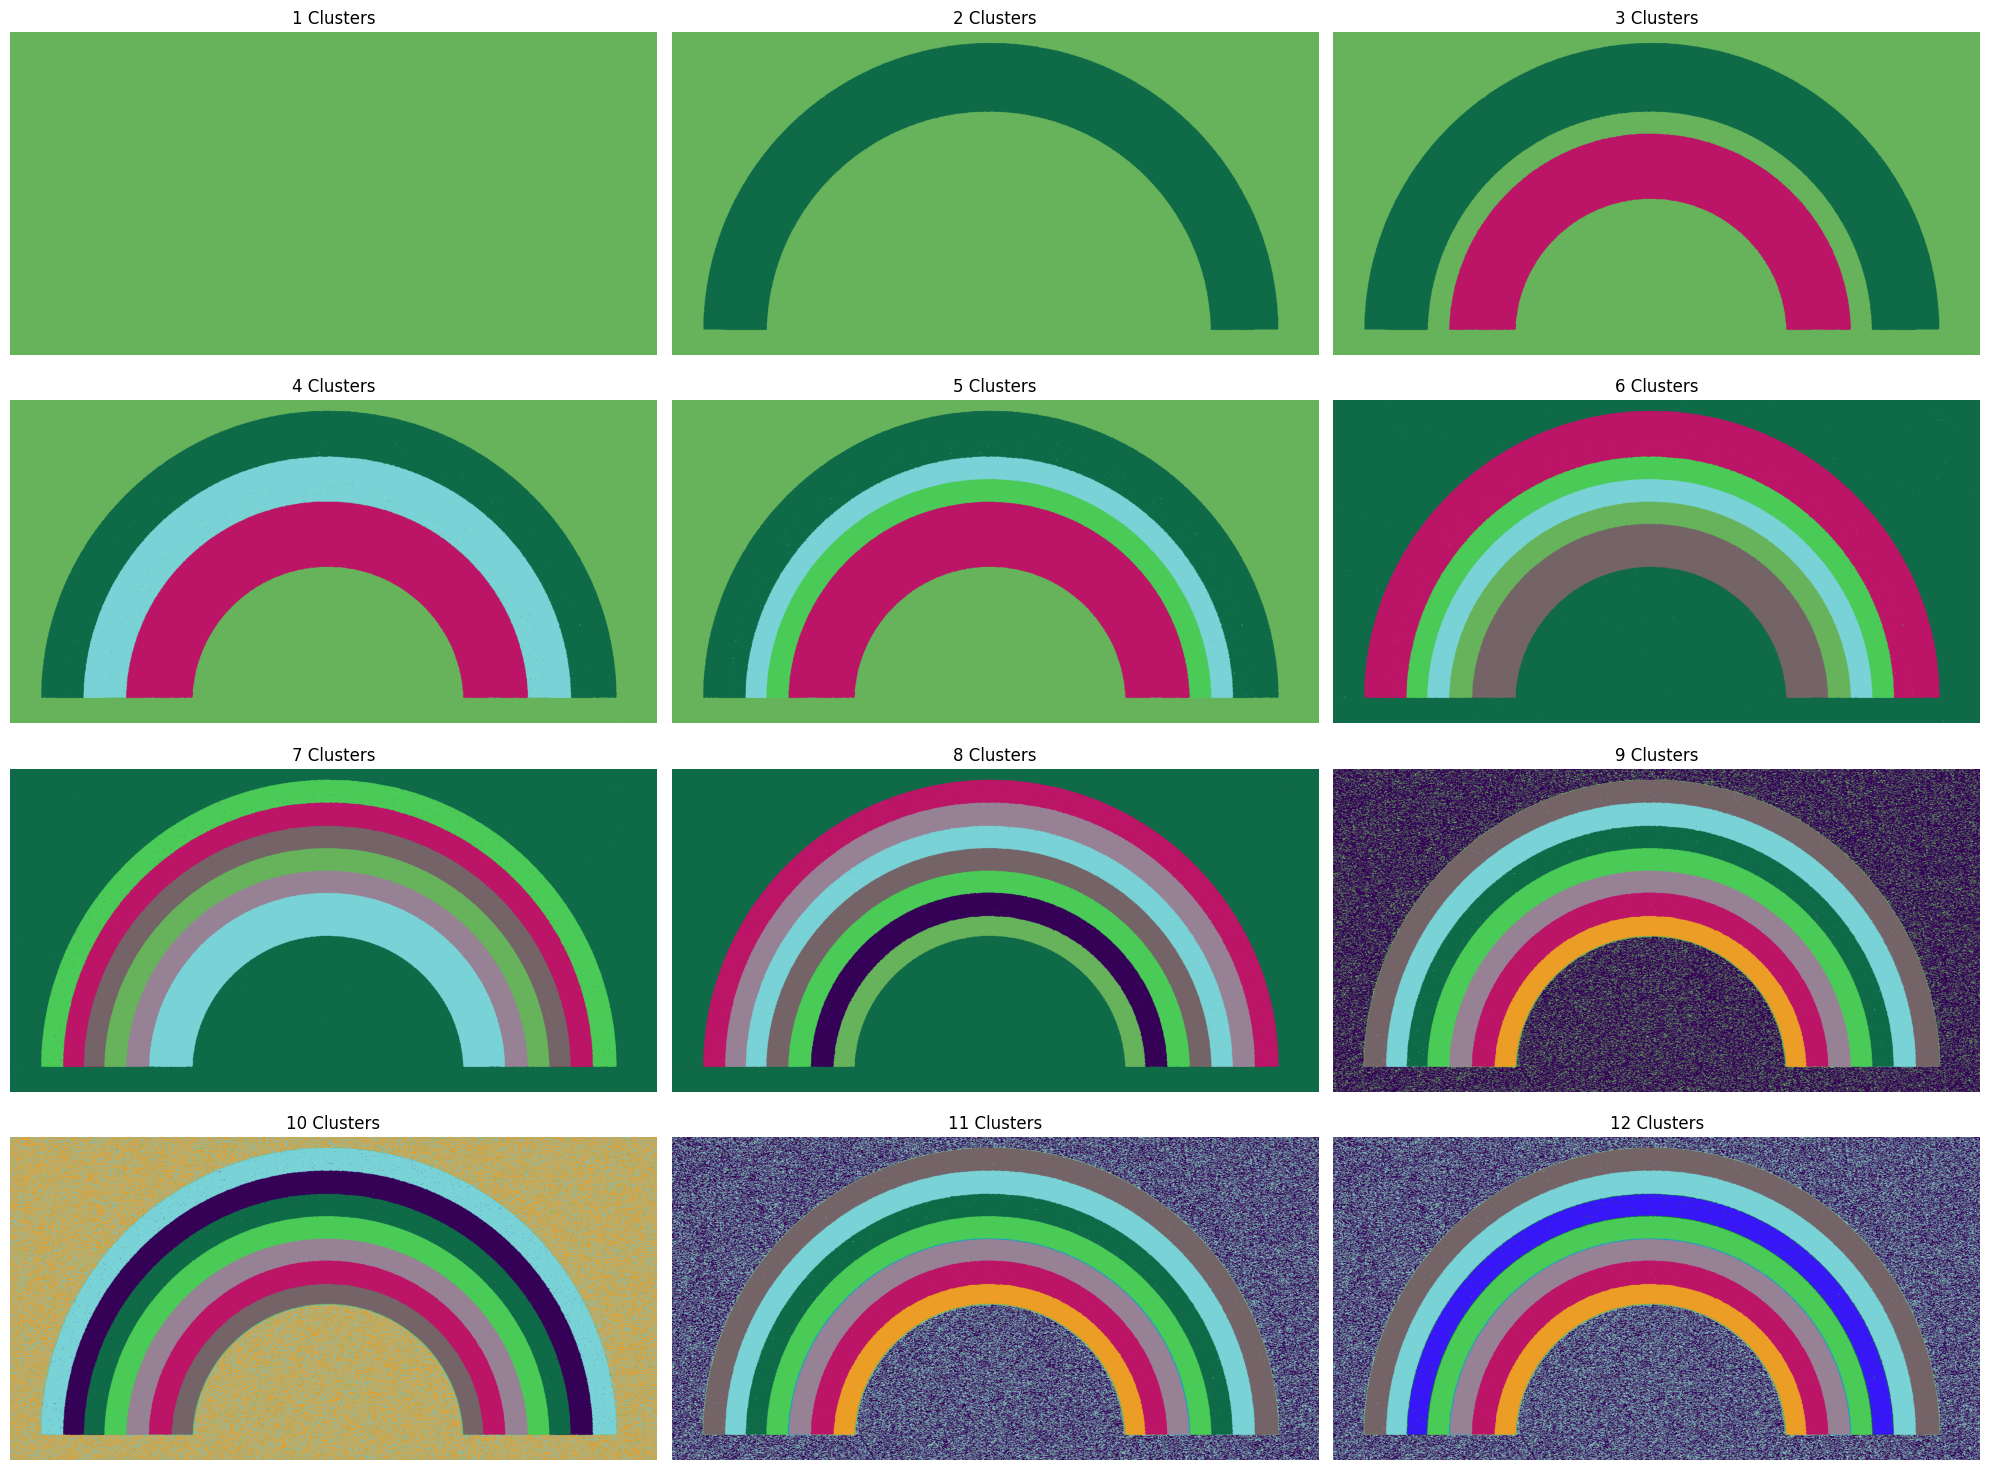

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for n_clusters, ax in zip(range(1, 13), axes):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    smoothened_data["Cluster"] = kmeans.fit_predict(scaler.fit_transform(smoothened_data[["R", "G", "B"]]))

    np.random.seed(42)
    cluster_colors = np.random.randint(0, 256, size=(n_clusters, 3))

    clustered_image = cluster_colors[smoothened_data["Cluster"]].reshape((height, width, 3)).astype(np.uint8)

    ax.imshow(clustered_image)
    ax.set_title(f"{n_clusters} Clusters")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [9]:
"""In the above image we can see that for 9 clusters the kmeans reached a better segmentation stage, i.e. 7 clusters for 7 colors and 1 clusters is for the noise that is there in the image and another cluster is for the background pixels. After 9th cluster if we increase the number of clusters there isn't any advantage instead it increases the time and space complexity of the model. We can also observe that without the x,y co-ordinates we are getting a better result than that of with co-ordinates."""

"In the above image we can see that for 9 clusters the kmeans reached a better segmentation stage, i.e. 7 clusters for 7 colors and 1 clusters is for the noise that is there in the image and another cluster is for the background pixels. After 9th cluster if we increase the number of clusters there isn't any advantage instead it increases the time and space complexity of the model. We can also observe that without the x,y co-ordinates we are getting a better result than that of with co-ordinates."

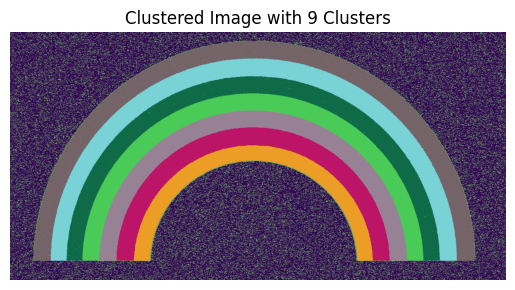

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

smoothened_data = smoothened_gamma_data.copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(smoothened_data[["R", "G", "B"]])

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
smoothened_data["Cluster"] = kmeans.fit_predict(scaled_data)

np.random.seed(42)
cluster_colors = np.random.randint(0, 256, size=(n_clusters, 3))

clustered_image = cluster_colors[smoothened_data["Cluster"]].reshape((height, width, 3)).astype(np.uint8)

plt.imshow(clustered_image)
plt.title(f"Clustered Image with {n_clusters} Clusters")
plt.axis("off")
plt.show()


In [11]:

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
smoothened_data["Cluster"] = kmeans.fit_predict(scaled_data)

smoothened_data["Cluster"] = kmeans.labels_

#Appending the cluster labels to the smoothened_data dataframe
print(smoothened_data.head())

   x  y   R   G   B  Cluster
0  0  0  37  37  23        0
1  1  0  30  30  18        0
2  2  0  24  24  15        7
3  3  0  22  22  16        7
4  4  0  20  19  15        7


Cluster Pixel Counts:
 Cluster
0    163680
1     96523
2     72672
3    111184
4     89611
5    120337
6     79441
7    495454
8     55101
Name: count, dtype: int64


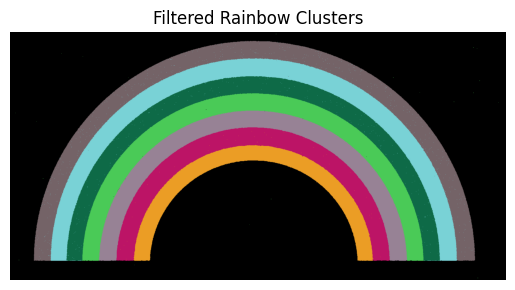

In [12]:
# Removing the noise
cluster_counts = smoothened_data["Cluster"].value_counts().sort_index()
print("Cluster Pixel Counts:\n", cluster_counts)

# Clusters with rainbow color information, the cluster 0, 7 is for noise and background that we are removing now and making the image noise free
rainbow_clusters = [1,2,3,4,5,6,8]

rainbow_mask = smoothened_data["Cluster"].isin(rainbow_clusters)

filtered_colors = np.zeros_like(cluster_colors)
filtered_colors[rainbow_clusters] = cluster_colors[rainbow_clusters]

filtered_image = filtered_colors[smoothened_data["Cluster"]].reshape((height, width, 3)).astype(np.uint8)

plt.imshow(filtered_image)
plt.title("Filtered Rainbow Clusters")
plt.axis("off")
plt.show()


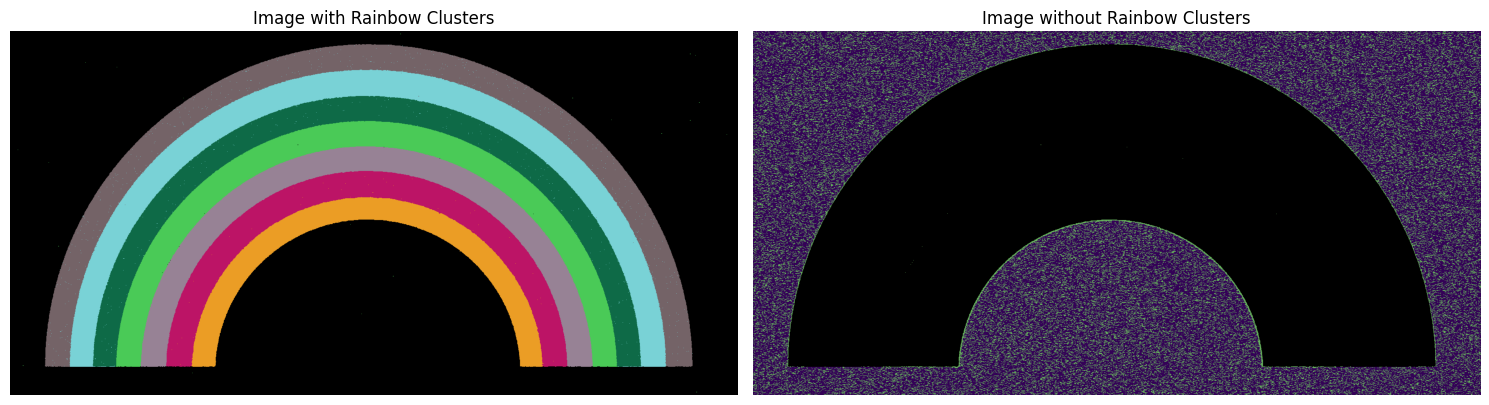

In [13]:
#Plotting the image with rainbow clusters and without the rainbow clusters
filtered_colors_with_rainbow = np.zeros_like(cluster_colors)
filtered_colors_with_rainbow[rainbow_clusters] = cluster_colors[rainbow_clusters]
filtered_image_with_rainbow = filtered_colors_with_rainbow[smoothened_data["Cluster"]].reshape((height, width, 3)).astype(np.uint8)

filtered_colors_without_rainbow = np.zeros_like(cluster_colors)
background_clusters = [cluster for cluster in range(n_clusters) if cluster not in rainbow_clusters]
filtered_colors_without_rainbow[background_clusters] = cluster_colors[background_clusters]
filtered_image_without_rainbow = filtered_colors_without_rainbow[smoothened_data["Cluster"]].reshape((height, width, 3)).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(filtered_image_with_rainbow)
axes[0].set_title("Image with Rainbow Clusters")
axes[0].axis("off")

axes[1].imshow(filtered_image_without_rainbow)
axes[1].set_title("Image without Rainbow Clusters")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [14]:
"""As mentioned earlier, in the left image there are [1,2,3,4,5,6,8] clusters which contain the rainbow information and to the right there are [0,7] clusters which contain only the noise and the background"""

'As mentioned earlier, in the left image there are [1,2,3,4,5,6,8] clusters which contain the rainbow information and to the right there are [0,7] clusters which contain only the noise and the background'

## Task 4: Custom Clustering Algorithm with PyTorch

### Objective
In this task, you'll take a step beyond pre-built libraries and implement your own clustering algorithm using PyTorch. This exercise will help you understand the mechanics of clustering and give you a deeper appreciation for how these algorithms work under the hood.

### Steps to Follow

1. **Prepare the Data**:
   - Ensure that the data is in a format suitable for PyTorch (i.e., convert the relevant DataFrame columns to PyTorch tensors).
   - Scale the features as needed. You can apply any scaling or normalization strategy you find useful.

2. **Initialize Centroids**:
   - Randomly select initial centroids from the dataset. The number of clusters should be chosen based on your analysis (e.g., 8 clusters).

3. **Implement the Clustering Algorithm**:
   - Create a loop for a set number of iterations:
     - **Calculate Distances**: Compute the distance from each data point to each centroid.
     - **Assign Labels**: Assign each data point to the nearest centroid.
     - **Update Centroids**: Recompute each centroid as the mean of all points assigned to it.
   - *Hint*: Use `torch.cdist()` for distance calculation and `torch.mean()` for centroid updates.

4. **Add Cluster Labels to the DataFrame**:
   - Convert the computed cluster labels from PyTorch tensors back to a format that can be added to the DataFrame for visualization.

5. **Visualize the Clusters**:
   - Plot the clustered image data to show how the pixels are grouped. Use any visualization library you prefer.

Converged after 75 iterations


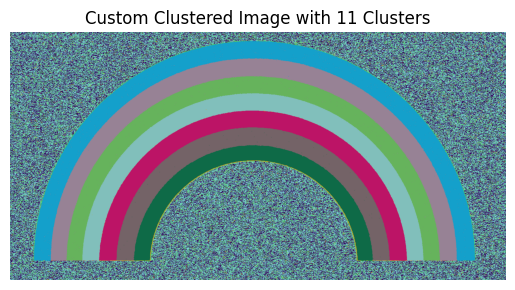

In [15]:
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import torch 

#Setting seed for reproductability 
torch.manual_seed(42)
np.random.seed(42)

rgb_values = torch.tensor(smoothened_data[["R", "G", "B"]].values, dtype=torch.float32)

scaler = StandardScaler()
scaled_rgb = torch.tensor(scaler.fit_transform(rgb_values), dtype=torch.float32)

n_clusters = 11
initial_indices = torch.randint(0, len(scaled_rgb), (n_clusters,))
centroids = scaled_rgb[initial_indices]

num_iterations = 150
for i in range(num_iterations):
    distances = torch.cdist(scaled_rgb, centroids)

    labels = torch.argmin(distances, dim=1)

    # The centroids are updated by taking the mean of all the pixels assigned to each cluster
    new_centroids = torch.stack([scaled_rgb[labels == k].mean(dim=0) if (labels == k).sum() > 0 else centroids[k] for k in range(n_clusters)])
    
    if torch.allclose(centroids, new_centroids, atol=1e-4):
        print(f"Converged after {i+1} iterations")
        break
    centroids = new_centroids

smoothened_data["CustomCluster"] = labels.numpy()

np.random.seed(42)
cluster_colors = np.random.randint(0, 256, size=(n_clusters, 3))

clustered_image = cluster_colors[smoothened_data["CustomCluster"]].reshape((height, width, 3)).astype(np.uint8)

plt.imshow(clustered_image)
plt.title(f"Custom Clustered Image with {n_clusters} Clusters")
plt.axis("off")
plt.show()

In [16]:
"""In the above code we are trying to build custom clustering algorithm using PyTorch which mimic KMeans and we are achieving this with the help of .cdist from torch package which helps us to compute pairwise distances between data points and centroids. """

'In the above code we are trying to build custom clustering algorithm using PyTorch which mimic KMeans and we are achieving this with the help of .cdist from torch package which helps us to compute pairwise distances between data points and centroids. '

In [17]:
smoothened_data.head()

x  y   R   G   B  Cluster  CustomCluster
0  0  0  37  37  23        0              4
1  1  0  30  30  18        0              4
2  2  0  24  24  15        7              3
3  3  0  22  22  16        7              3
4  4  0  20  19  15        7              3

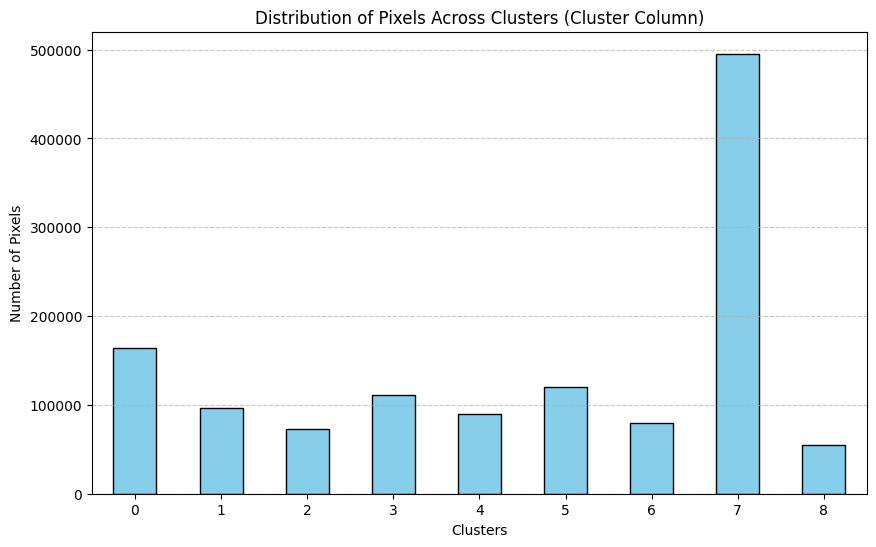

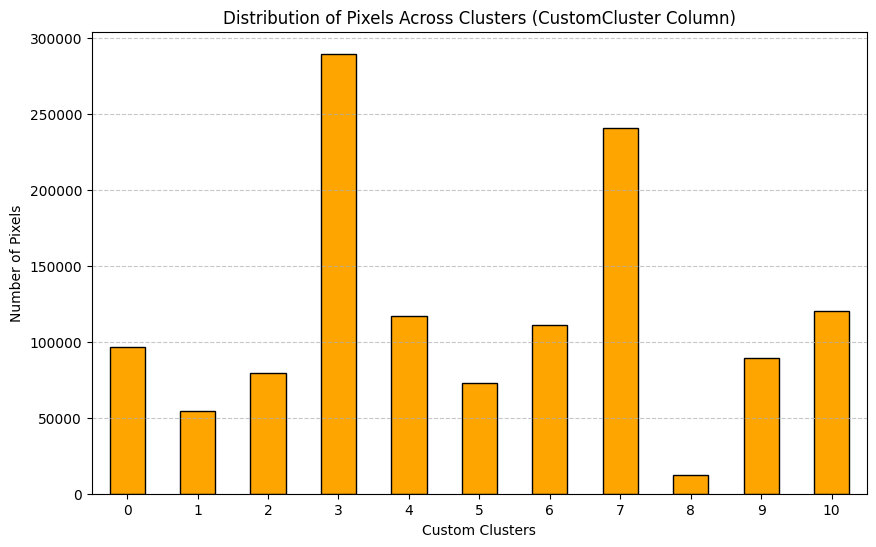

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
cluster_counts = smoothened_data["Cluster"].value_counts().sort_index()
cluster_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Pixels Across Clusters (Cluster Column)")
plt.xlabel("Clusters")
plt.ylabel("Number of Pixels")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
custom_cluster_counts = smoothened_data["CustomCluster"].value_counts().sort_index()
custom_cluster_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Distribution of Pixels Across Clusters (CustomCluster Column)")
plt.xlabel("Custom Clusters")
plt.ylabel("Number of Pixels")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [19]:
"""The KMeans achieved a good segementation between colors at 9 clusters but for custom clusters we got good results around 11 clusters and it is dues to the way in which the initial centroids where selected, apart from that there are many difference like KMeans is optimized for high floating point precision which lacks in our custom implementation, KMeans ensures that clusters are converged in a more stable manner but in our custom clustering implementation the convergence criteria is less optimal. These are some of hte reasons why we didn't get best segmentation at 9 clusters. Note: If you run the code again the custom implementation might give different results even if we set the seed due to the random nature of the implemenation."""

"The KMeans achieved a good segementation between colors at 9 clusters but for custom clusters we got good results around 11 clusters and it is dues to the way in which the initial centroids where selected, apart from that there are many difference like KMeans is optimized for high floating point precision which lacks in our custom implementation, KMeans ensures that clusters are converged in a more stable manner but in our custom clustering implementation the convergence criteria is less optimal. These are some of hte reasons why we didn't get best segmentation at 9 clusters. Note: If you run the code again the custom implementation might give different results even if we set the seed due to the random nature of the implemenation."